<a href="https://colab.research.google.com/github/ParisDBRavo/Backpropagation-in-deep-network/blob/main/Tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retropropagación de Red Densa

Primero se va a importar todas las librerías que se requieren para este trabajo.

In [ ]:
import numpy as np
import csv
import pandas as pd

Después se define la función de activación como una función y su derivada, que se utilizarán después.

In [ ]:
def sigmoide(x):
    return 1/(1+np.exp(-x))

In [ ]:
def derivada_sigmoide(x):
    return np.multiply(sigmoide(x), (1.0 - sigmoide(x)))

A continuación se define la función de pérdida en este caso dada por la siguiente fórmula:
$$
ECB(\mathbf{y}, \mathbf{\hat{y}})  = -\sum_{i=1}^N \left[ y^{(i)} \log \hat{y}^{(i)} + (1 - y^{(i)}) \log (1 - \hat{y}^{(i)}) \right]
$$

In [ ]:
def entropia_cruzada_binaria(y, p):
    p[p == 0] = np.nextafter(0., 1.)
    p[p == 1] = np.nextafter(1., 0.)
    return -(np.log(p[y == 1]).sum() + np.log(1 - p[y == 0]).sum())

Para medir la exactitud del modelo se utilizará la siguiente fórmula:
$$
exactitud = \frac{correctos}{total}
$$

In [ ]:
def exactitud(y, y_predicha):
    return (y == y_predicha).mean() * 100

# Calculo en sentido normal
Para el cálculo hacia adelante definimos las siguientes variables que serán de utilidad para la retropropagación. Al ser una red densa con dos capas ocultas se tienen 3 matrices de pesos y sus correspondientes sesgos $\{\mathbf{W}^{\{1\}}, \mathbf{b}^{\{1\}}\}$, $\{\mathbf{W}^{\{2\}}, \mathbf{b}^{\{2\}}\}$ y $\{\mathbf{W}^{\{3\}}, \mathbf{b}^{\{3\}}\}$ correspondientes a las dos capas ocultas y la de salida.
* $z_2 = W_1*X_i + b_1$
* $a_2 = \phi(z_2)$
* $z_3 = W_2*a_2 + b_2$
* $a_3 = \phi(z_3)$
* $z_4 = W_3*a_3 + b_3$
* $\hat{y} = \phi(z_4)$

Donde en este caso $\phi$ va a ser la función sigmoide.

In [ ]:
def hacia_adelante(x, W1, b1, W2, b2, W3, b3):
    z2 = np.dot(W1.T, x[:, np.newaxis]) + b1
    a2 = sigmoide(z2)
    z3 = np.dot(W2.T, a2) + b2
    a3 = sigmoide(z3)
    z4 = np.dot(W3.T, a3) + b3
    y_hat = sigmoide(z4)
    #print(f'Y_HAT = {y_hat}')
    #print(f'a3 = {a3}')
    return z2, a2, z3, a3, z4, y_hat

Lo último que falta para esta red es utilizar todas las herramientas que se han programado hasta ahora y juntarlo con la retropropagación de la función de pérdida respecto a los pesos y sesgos. Vamos a calcular $\frac{\partial \mathcal{L}}{\partial W_3}$ y $\frac{\partial \mathcal{L}}{\partial W_2}$ como ejemplo:
$$
\frac{\partial \mathcal{L}}{\partial W_3}= -\frac{\partial}{\partial W_3}\sum_{i=1}^N \left[ y^{(i)} \log \hat{y}^{(i)} + (1 - y^{(i)}) \log (1 - \hat{y}^{(i)}) \right] =-\sum_{i=1}^N \left[ \frac{\partial}{\partial W_3}y^{(i)} \log \hat{y}^{(i)} + \frac{\partial}{\partial W_3}(1 - y^{(i)}) \log (1 - \hat{y}^{(i)}) \right]
$$
$$
=-\sum_{i=1}^N \left[ y^{(i)} \frac{\partial}{\partial W_3}\log \hat{y}^{(i)} + (1 - y^{(i)}) \frac{\partial}{\partial W_3}\log (1 - \hat{y}^{(i)}) \right]=-\sum_{i=1}^N \left[ y^{(i)} \frac{\frac{\partial \hat{y}^{(i)}}{\partial W_3}}{ \hat{y}^{(i)}} + (1 - y^{(i)}) \frac{\frac{\partial (1 - \hat{y}^{(i)})}{\partial W_3}}{(1 - \hat{y}^{(i)})} \right]=-\sum_{i=1}^N \left[ \frac{y^{(i)}}{\hat{y}^{(i)}} \frac{\partial \hat{y}^{(i)}}{\partial W_3} - \frac{(1 - y^{(i)})}{(1 - \hat{y}^{(i)})} \frac{\partial  \hat{y}^{(i)}}{\partial W_3} \right]
$$
Para calcular $\frac{\partial  \hat{y}^{(i)}}{\partial W_3}$ se utiliza la regla de la cadena:
$$
\frac{\partial  \hat{y}^{(i)}}{\partial W_3}=\frac{\partial  \hat{y}^{(i)}}{\partial z_4}\frac{\partial  z_4}{\partial W_3}=\frac{\partial  \hat{y}^{(i)}}{\partial z_4} *a_3.
$$
Ya que $z_4 = W_3*a_3 + b_3$. Para calcular $\frac{\partial \mathcal{L}}{\partial W_2}$ se sigue un proceso similar al anterior sólo cambia en la utilización de la regla de la cadena como se muestra a continuación:
$$
\frac{\partial \mathcal{L}}{\partial W_2}=-\sum_{i=1}^N \left[ \frac{y^{(i)}}{\hat{y}^{(i)}} \frac{\partial \hat{y}^{(i)}}{\partial W_2} - \frac{(1 - y^{(i)})}{(1 - \hat{y}^{(i)})} \frac{\partial  \hat{y}^{(i)}}{\partial W_2} \right]
$$
Entonces para calcular $\frac{\partial  \hat{y}^{(i)}}{\partial W_2}$ se utiliza la regla de la cadena de nuevo de la siguiente manera:
$$
\frac{\partial  \hat{y}^{(i)}}{\partial W_2}=\frac{\partial  \hat{y}^{(i)}}{\partial z_4}\frac{\partial  z_4}{\partial W_2}=\frac{\partial  \hat{y}^{(i)}}{\partial z_4}\frac{\partial  z_4}{\partial a_3}\frac{\partial  a_3}{\partial W_2}= \frac{\partial  \hat{y}^{(i)}}{\partial z_4}W_3\frac{\partial  a_3}{\partial z_3}a_2.
$$
Con lo cual se utilizan los valores y calculados para $\frac{\partial \mathcal{L}}{\partial W_3}$ haciendo así la retropropagación, con lo cual ya se tienen todos los elementos para programar. El tamaño de $W_1$, $W_2$ vienen ejemplificados en la siguiente imágen.

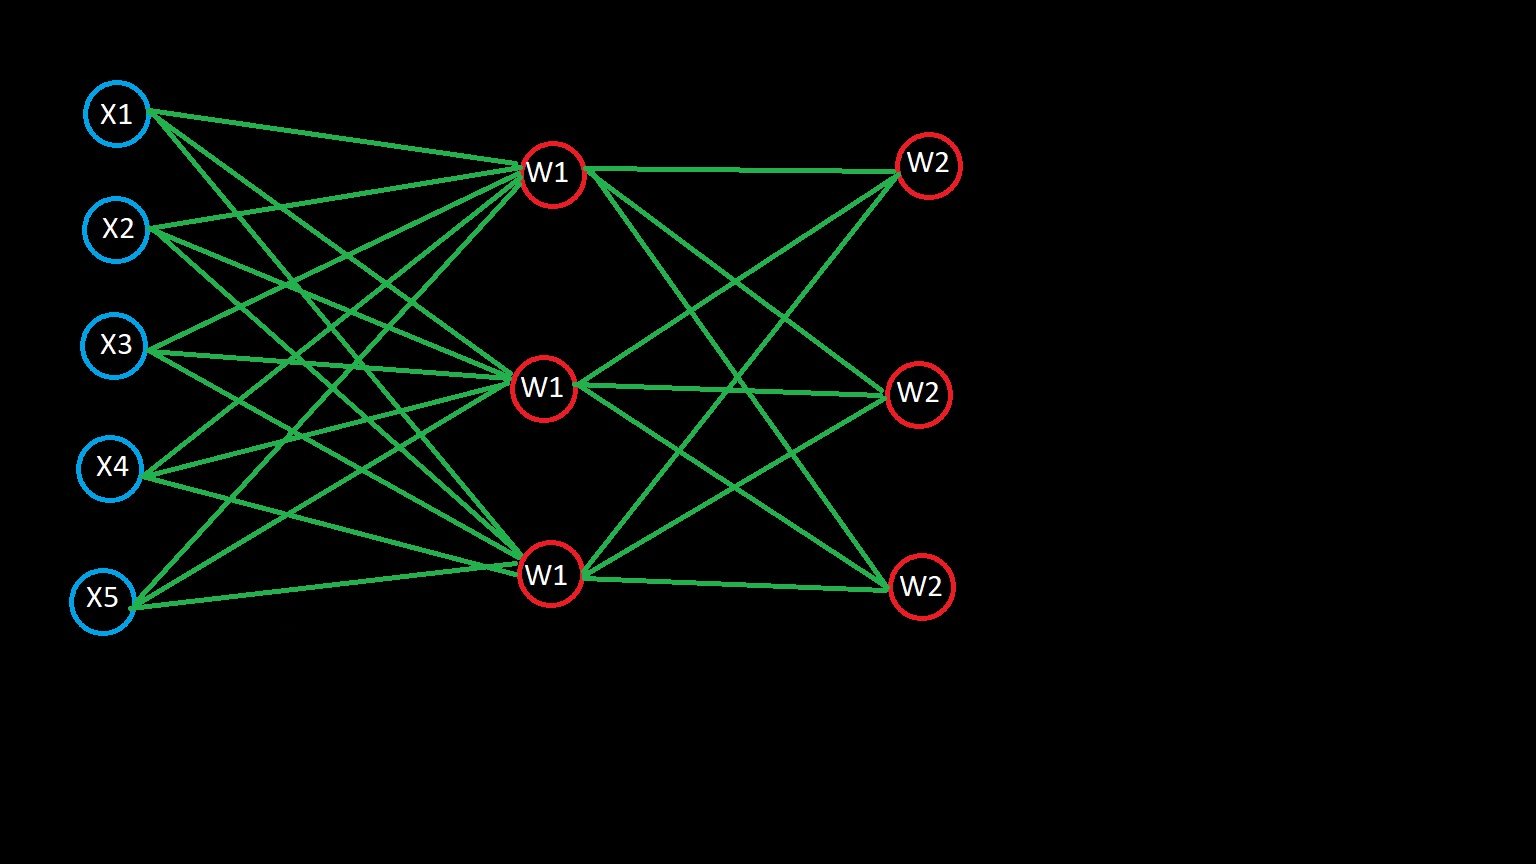


In [ ]:
from turtle import shape


def retropropagacion(X,y, alpha=0.01, n_epocas =100, n_ocultas=10):
    n_ejemplos=X.shape[0]
    n_entradas=X.shape[1]
    #print(n_ejemplos,n_entradas)
    #Inicializando las variables de W y b
    #W1 es una matriz de tamaño NumEntradasxNumdecapasdelared 
    #Mejor explicado en el dibujo
    W1 = np.sqrt(1.0 / n_entradas) * np.random.randn(n_entradas, n_ocultas)
    b1 = np.zeros((n_ocultas, 1))
    #W2 es una matriz de tamaño NumdeCapasdelaredxNumdecapasdelared 
    W2 = np.sqrt(1.0 / n_ocultas) * np.random.randn(n_ocultas, n_ocultas)
    b2 = np.zeros((n_ocultas, 1))
    #W3 al ser la capa de salida es de tamaño NumdeCapasdelaredx1 al ser la salida binaria 
    W3 = np.sqrt(1.0 / n_ocultas) * np.random.randn(n_ocultas, 1)
    b3 = np.zeros((1, 1))
    
    perdidas = np.zeros((n_epocas))
    exactitudes = np.zeros((n_epocas))
    y_predicha = np.zeros((y.shape))

    for i in range(n_epocas):
        for j in range(n_ejemplos):
            z2, a2, z3, a3, z4, y_hat = hacia_adelante(X[j], W1, b1, W2, b2, W3, b3) 
            
            #Se hará la retropropagacion para W3 y b3
            dz4= y_hat-y[j]
            dW3=np.outer(a3,dz4)
            db3=dz4
            #print(y[j])
            #Ahora para W2 y b2
            dz3= np.dot(W3,dz4)* derivada_sigmoide(z3)
            dW2=np.outer(a2, dz3)
            db2=dz3

            #Finalmente para W1 y b1
            dz2=np.dot(W2,dz3)* derivada_sigmoide(z2)
            dW1=np.outer(X[j], dz2)
            db1=dz2

            #Actualización de los parámetros
            #print(type(W2))
            W3=W3-alpha*dW3
            b3=b3-alpha*db3
            #print(W3.shape,dz4.shape)
            W2=W2-alpha*dW2
            b2=b2-alpha*db2
            
            W1=W1-alpha*dW1
            b1=b1-alpha*db1

            y_predicha[j]= y_hat

        #Calculo de pérdidas en cada época
        perdidas[i] = entropia_cruzada_binaria(y, y_predicha)
        exactitudes[i] = exactitud(y, np.round(y_predicha))
        print('Epoch {0}: Pérdida = {1} Exactitud = {2}'.format(i, 
                                                              perdidas[i], 
                                                              exactitudes[i]))
    return W1,W2,W3,perdidas, exactitudes


# Primer prueba para la red 
Para la primer prueba de la red se va utilizar una compuera XOR.


| $x_1$ | $x_2$ | $y$
| ------------- |:-------------:| -----:|
|0 |0 |0|
|0 |1 |1|
|1 |0 |1|
|1 |1 |0|

In [ ]:
# ejemplo (XOR)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0, 1, 1, 0]]).T
print(y.shape)

(4, 1)


In [ ]:
np.random.seed(0)
W1, W2, W3, perdidas, exactitudes = retropropagacion(X, 
                                                 y, 
                                                 alpha = 0.5, 
                                                 n_epocas = 500,
                                                 n_ocultas = 20)

Epoch 0: Pérdida = 4.635396037575155 Exactitud = 50.0
Epoch 1: Pérdida = 4.323590601178358 Exactitud = 50.0
Epoch 2: Pérdida = 4.126310272935596 Exactitud = 50.0
Epoch 3: Pérdida = 3.9573180354349056 Exactitud = 50.0
Epoch 4: Pérdida = 3.817473534238595 Exactitud = 50.0
Epoch 5: Pérdida = 3.704269329238952 Exactitud = 50.0
Epoch 6: Pérdida = 3.613566018381353 Exactitud = 50.0
Epoch 7: Pérdida = 3.5408919622571897 Exactitud = 50.0
Epoch 8: Pérdida = 3.4822628576147494 Exactitud = 50.0
Epoch 9: Pérdida = 3.4344608276843713 Exactitud = 50.0
Epoch 10: Pérdida = 3.395011368454609 Exactitud = 50.0
Epoch 11: Pérdida = 3.3620519595309784 Exactitud = 50.0
Epoch 12: Pérdida = 3.334188529607278 Exactitud = 50.0
Epoch 13: Pérdida = 3.310374121217041 Exactitud = 50.0
Epoch 14: Pérdida = 3.2898159862340597 Exactitud = 50.0
Epoch 15: Pérdida = 3.271907470393643 Exactitud = 50.0
Epoch 16: Pérdida = 3.2561789372218666 Exactitud = 50.0
Epoch 17: Pérdida = 3.2422625489845127 Exactitud = 50.0
Epoch 18: Pé

Una vez entrenada la red vamos a graficar la exactitud y la entropía cruzada binaria para tener una mejor idea de lo que esta pasando.

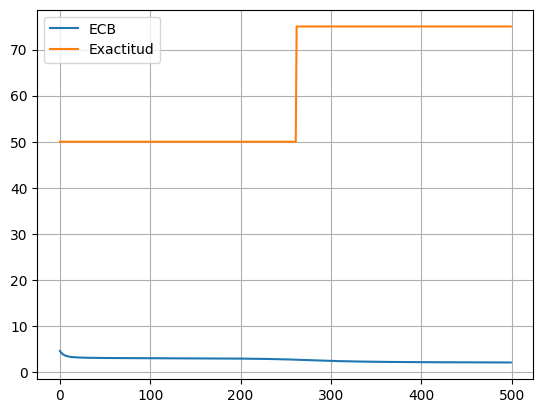

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.arange(perdidas.size), perdidas, label='ECB')
plt.plot(np.arange(exactitudes.size), exactitudes, label='Exactitud')
plt.legend()
plt.grid(True)
plt.show()

# Cambiando el valor de $\alpha$
Como los resultados no fueron los esperados vamos a cambiar los valores de $\alpha$ que es la tasa de aprendizaje del modelo. Es importante mencionar como para el ejemplo en clase donde es una red compuesta de una capa oculta y una de salida los parámetros anteriores eran suficientes para tener un buen resultado en el modelo por lo que aquí se ve como estos valores deben de cambiar cuando implementas redes distintas aunque la tarea sea la misma.

In [ ]:
np.random.seed(0)
W1, W2, W3, perdidas, exactitudes = retropropagacion(X, 
                                                 y, 
                                                 alpha = 1.0, 
                                                 n_epocas = 500,
                                                 n_ocultas = 5)

Epoch 0: Pérdida = 4.510939294047824 Exactitud = 25.0
Epoch 1: Pérdida = 4.077471648653613 Exactitud = 50.0
Epoch 2: Pérdida = 3.9097719669780875 Exactitud = 50.0
Epoch 3: Pérdida = 3.7785383957141376 Exactitud = 50.0
Epoch 4: Pérdida = 3.6826051263935833 Exactitud = 50.0
Epoch 5: Pérdida = 3.6143904244536897 Exactitud = 50.0
Epoch 6: Pérdida = 3.56557707684294 Exactitud = 50.0
Epoch 7: Pérdida = 3.529786362817096 Exactitud = 50.0
Epoch 8: Pérdida = 3.5027749602787943 Exactitud = 50.0
Epoch 9: Pérdida = 3.4818245695741012 Exactitud = 50.0
Epoch 10: Pérdida = 3.4651803174161215 Exactitud = 50.0
Epoch 11: Pérdida = 3.451681721479306 Exactitud = 50.0
Epoch 12: Pérdida = 3.440539546804972 Exactitud = 50.0
Epoch 13: Pérdida = 3.431202157600876 Exactitud = 50.0
Epoch 14: Pérdida = 3.423274175271027 Exactitud = 50.0
Epoch 15: Pérdida = 3.416465744545185 Exactitud = 50.0
Epoch 16: Pérdida = 3.4105600471912965 Exactitud = 50.0
Epoch 17: Pérdida = 3.405391961957278 Exactitud = 50.0
Epoch 18: Pér

Se puede apreciar como la exactitud ya llega a un valor de $100$ y la pérdida disminuyó significativamente.

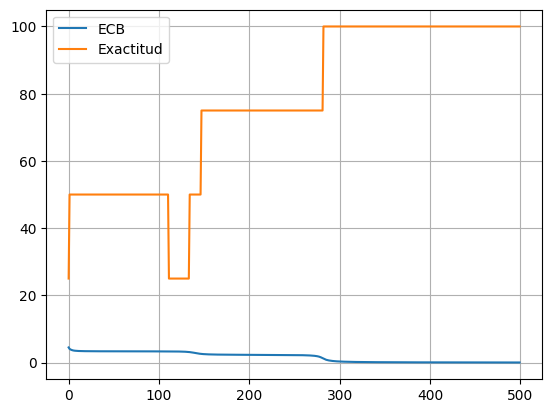

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.arange(perdidas.size), perdidas, label='ECB')
plt.plot(np.arange(exactitudes.size), exactitudes, label='Exactitud')
plt.legend()
plt.grid(True)
plt.show()

# Nueva serie de datos y su discusión.
Para probar más la red se utilizaron los datos del COIL Challenge 2000, el cual consiste en un reto para responder la pregunta de si se puede predecir quienes estarían interesados en comprar una poliza de seguros para una caravana y por qué. Por lo que se tiene una salida binaria; los que si esten interesados y los que no denotados por $1$ y $0$ respectivamente. Para hacer la especulación de entrada a la red son distintos datos sociales y económicos de las personas. Entonces cada conjunto de entradas $X^{(i)}$ son las características de una persona. Por estas razones pensé que sería datos interesantes para probar la red.

In [ ]:

#csvFile= csv.reader(open('ValoresX.csv', "r"), delimiter = ",")
#X1=[]
#for row in csvFile:
#    X1.append(row)
#X1=np.asarray(X1)
X1 = pd.read_csv('ValoresX.csv', header=None)
print(X1.head(5))
X1=X1.values.tolist()
X1=np.asarray(X1)
Y1 = pd.read_csv('ValoresY.csv', header=None)
Y1=Y1.values.tolist()
Y1=np.asarray(Y1)
#Y1=Y1.T
print(Y1.shape)
#print(Y1)

   0   1   2   3   4   5   6   7   8   9   ...  75  76  77  78  79  80  81  \
0  33   1   3   2   8   0   5   1   3   7  ...   0   0   0   0   1   0   0   
1  37   1   2   2   8   1   4   1   4   6  ...   0   0   0   0   1   0   0   
2  37   1   2   2   8   0   4   2   4   3  ...   0   0   0   0   1   0   0   
3   9   1   3   3   3   2   3   2   4   5  ...   0   0   0   0   1   0   0   
4  40   1   4   2  10   1   4   1   4   7  ...   0   0   0   0   1   0   0   

   82  83  84  
0   0   0   0  
1   0   0   0  
2   0   0   0  
3   0   0   0  
4   0   0   0  

[5 rows x 85 columns]
(5822, 1)


In [ ]:
np.random.seed(0)
W1, W2, W3, perdidas, exactitudes = retropropagacion(X1, 
                                                 Y1, 
                                                 alpha = 0.01, 
                                                 n_epocas = 500,
                                                 n_ocultas = 10)

Epoch 0: Pérdida = 1356.240338021865 Exactitud = 93.67914805908623
Epoch 1: Pérdida = 1281.7804189268347 Exactitud = 94.02267262109241
Epoch 2: Pérdida = 1261.388213769259 Exactitud = 94.02267262109241
Epoch 3: Pérdida = 1240.660133551955 Exactitud = 94.02267262109241
Epoch 4: Pérdida = 1225.8365938922288 Exactitud = 94.02267262109241
Epoch 5: Pérdida = 1214.774062202615 Exactitud = 94.02267262109241
Epoch 6: Pérdida = 1207.5884851822666 Exactitud = 94.02267262109241
Epoch 7: Pérdida = 1201.5267086956546 Exactitud = 94.02267262109241
Epoch 8: Pérdida = 1196.5946883568008 Exactitud = 94.02267262109241
Epoch 9: Pérdida = 1193.0378169789349 Exactitud = 94.02267262109241
Epoch 10: Pérdida = 1190.1103362501483 Exactitud = 94.02267262109241
Epoch 11: Pérdida = 1186.5575815894226 Exactitud = 94.02267262109241
Epoch 12: Pérdida = 1183.7491768845462 Exactitud = 94.02267262109241
Epoch 13: Pérdida = 1181.3869566091812 Exactitud = 94.02267262109241
Epoch 14: Pérdida = 1179.3605209374043 Exactitud

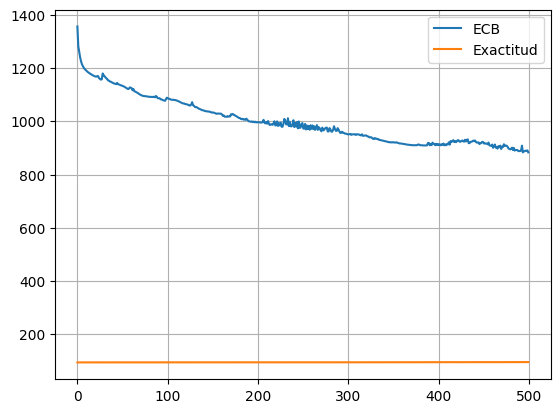

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.arange(perdidas.size), perdidas, label='ECB')
plt.plot(np.arange(exactitudes.size), exactitudes, label='Exactitud')
plt.legend()
plt.grid(True)
plt.show()

Los resultados son muy interesantes ya que a pesar de tener una exactitud del $95\%$ el valor de la entropía cruzada binaria al final es de $883.24$ algo increiblemente grande. Esto lo que esta diciendo es que cuando se equivoca se equivoca por mucho ya que si se recuerda lo mencionado en clase como opera la función de la entropía cruzada binaria cuando más lejos este $\hat{y}$ del valor real, más grande crecerá la función. Sin embargo no es algo de extrañarse ya que la distribución de $y$ en los datos no es uniforme ya que solo hay $348$ valores en los que $y=1$ siendo que el número total de valores es de $5822$ lo que representa aproximadamente el $6\%$ de los valores totales por lo que la red no tiene oportunidad de aprender bien que hacer en estos casos. Una propuesta para mejorar sin cambiarla arquitectura de la red y sin cambiar los parámetros es hacer un procesamiento de los datos.